In [69]:
import os
import numpy as np
import torch
import pandas as pd
from sklearn import metrics
import multiprocessing as mp
from stGACN import stGACN
import scanpy as sc
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
os.environ['R_HOME'] = "/root/miniconda3/envs/STAR/lib/R"
print(device)
n_clusters = 12

cuda


In [70]:
# read data
adata = sc.read('/home/zhangxinming/mymodel/Data/AD/8months-disease-replicate_1_data.h5ad')
adata.var_names_make_unique()

In [71]:
adata

AnnData object with n_obs × n_vars = 8186 × 2766
    obs: 'ct_top', 'ct_sub', 'sample', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [ ]:
model = stGACN.stGACN(adata,k_cutoff=6,device=device,neighborhood=7,model_select = 'KNN')
# train model
adata = model.train()

50
7
delete=false
------Calculating spatial graph...
The graph contains 49116 edges, 8186 cells.
6.0000 neighbors per cell on average.
Graph constructed!
------Calculating spatial graph...
The graph contains 8186 edges, 8186 cells.
1.0000 neighbors per cell on average.
Size of Input:  (8186, 2000)
Begin to train ST data...


100%|██████████| 800/800 [00:50<00:00, 15.83it/s]


Optimization finished for ST data!


In [73]:
# set radius to specify the number of neighbors considered during refinement
radius = 30
os.environ['R_HOME'] = "/home/zhangxinming/anaconda3/envs/Test/lib/R"
tool = 'mclust' # mclust, leiden, and louvain

# clustering
from stGACN.utils import clustering

if tool == 'mclust':
   clustering(adata, n_clusters, radius=radius, method=tool, refinement=False) # For DLPFC dataset, we use optional refinement step.
elif tool in ['leiden', 'louvain']:
   clustering(adata, n_clusters, radius=radius, method=tool, start=0.1, end=1.1, increment=0.01, refinement=False)

fitting ...
  |======================================================================| 100%


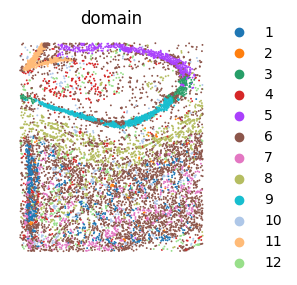

In [74]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 3)
sc.pl.spatial(adata,color = 'domain',frameon = False,colorbar_loc=None,spot_size=200)